In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images ,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


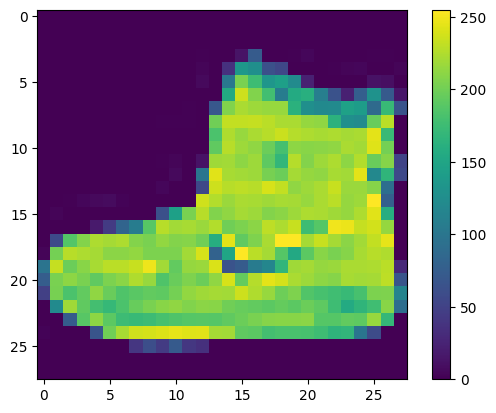

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
# plt.grid(True)
plt.show()

In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, InputLayer, Reshape, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Dense, Softmax, Flatten, Dropout

cnn = Sequential()
cnn.add(InputLayer((28, 28)))
cnn.add(Reshape((28, 28, 1)))
cnn.add(Conv2D(filters = 32, kernel_size = (2,2), strides = (1,1) ))
cnn.add(AveragePooling2D(pool_size = (2,2), strides = (1,1)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters = 64, kernel_size = (2,2), strides = (1,1) ))
cnn.add(AveragePooling2D(pool_size = (2,2), strides = (1,1)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters = 128, kernel_size = (2,2), strides = (1,1) ))
cnn.add(AveragePooling2D(pool_size = (2,2), strides = (1,1)))
cnn.add(BatchNormalization())
cnn.add(Flatten())
cnn.add(Dense(32, 'relu' ))
cnn.add(Dropout(0.2))
cnn.add(Dense(10, 'linear'))
cnn.add(Softmax())


In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 average_pooling2d (Average  (None, 26, 26, 32)        0         
 Pooling2D)                                                      
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        8256      
                                                                 
 average_pooling2d_1 (Avera  (None, 24, 24, 64)        0

In [7]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
cnn.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [9]:
cnn.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 19s 7ms/step - loss: 1.4083 - accuracy: 0.5449 - val_loss: 0.9380 - val_accuracy: 0.6723
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9862 - accuracy: 0.6313 - val_loss: 0.7689 - val_accuracy: 0.7070
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7982 - accuracy: 0.6761 - val_loss: 0.6108 - val_accuracy: 0.7412
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7217 - accuracy: 0.7110 - val_loss: 0.5915 - val_accuracy: 0.7731
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6489 - accuracy: 0.7594 - val_loss: 0.5109 - val_accuracy: 0.8245
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5771 - accuracy: 0.7858 - val_loss: 0.5049 - val_accuracy: 0.8274
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5416 - accuracy: 0.7994 - val_loss: 0.4831 - val_ac

In [10]:
for i in range(len(cnn.layers)):
	# check for convolutional layer
	if 'conv' not in cnn.layers[i].name:
		continue
	# get filter weights
	filters, biases = cnn.layers[i].get_weights()
	print("layer number",i,cnn.layers[i].name, filters.shape)

layer number 1 conv2d (2, 2, 1, 32)
layer number 4 conv2d_1 (2, 2, 32, 64)
layer number 7 conv2d_2 (2, 2, 64, 128)


In [11]:
# retrieve weights from the second hidden layer
filters , bias = cnn.layers[4].get_weights()

In [12]:
print(filters)
print(len(filters))

[[[[ 0.03450832 -0.08269302 -0.08910652 ...  0.06627676  0.06640735
    -0.03014478]
   [-0.14982226  0.11033241  0.0877813  ...  0.0768996   0.15957043
    -0.13821761]
   [ 0.05950959 -0.19011432 -0.24214365 ... -0.15857717 -0.25470933
    -0.04279902]
   ...
   [ 0.05942617 -0.01646314 -0.06754774 ...  0.1231719  -0.12006155
     0.1593274 ]
   [-0.13955623  0.06323528  0.27315947 ...  0.11437109  0.16255401
     0.04881262]
   [ 0.09260532  0.06527711 -0.18945326 ... -0.02320077 -0.15959089
    -0.17573395]]

  [[-0.10202459  0.11308147 -0.14546317 ... -0.06706888 -0.08140343
    -0.0490256 ]
   [-0.06227108 -0.01103608  0.04756465 ...  0.2233132   0.06659774
    -0.06310382]
   [ 0.14904176 -0.15505412 -0.14026439 ... -0.19859214 -0.0395818
     0.03393086]
   ...
   [ 0.30532047 -0.04694923  0.04559426 ...  0.07902244 -0.05064771
    -0.05417606]
   [-0.26586354  0.07312775  0.09755574 ...  0.08711101 -0.00932924
    -0.0216486 ]
   [ 0.26674533  0.04007163 -0.05278222 ...  0.086

In [13]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

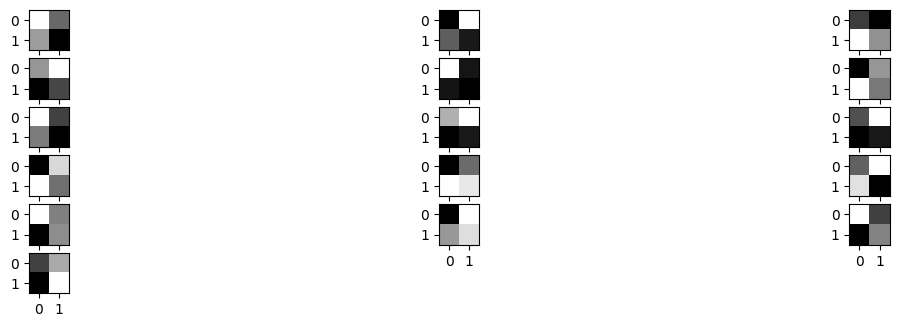

In [14]:
n_filters =16
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(1):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

In [15]:
from tensorflow.keras.models import Model

In [21]:
model = Model(inputs=cnn.inputs , outputs=cnn.layers[4].output)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 average_pooling2d (Average  (None, 26, 26, 32)        0         
 Pooling2D)                                                      
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        8256

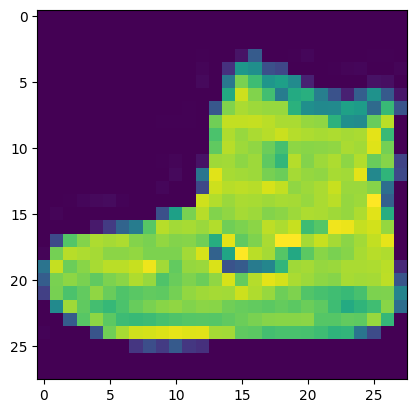

In [23]:
plt.imshow(train_images[0])

In [24]:
image_tensor=tf.reshape(train_images[0],(1,28,28))

1/1 [==============================] - 0s 265ms/step


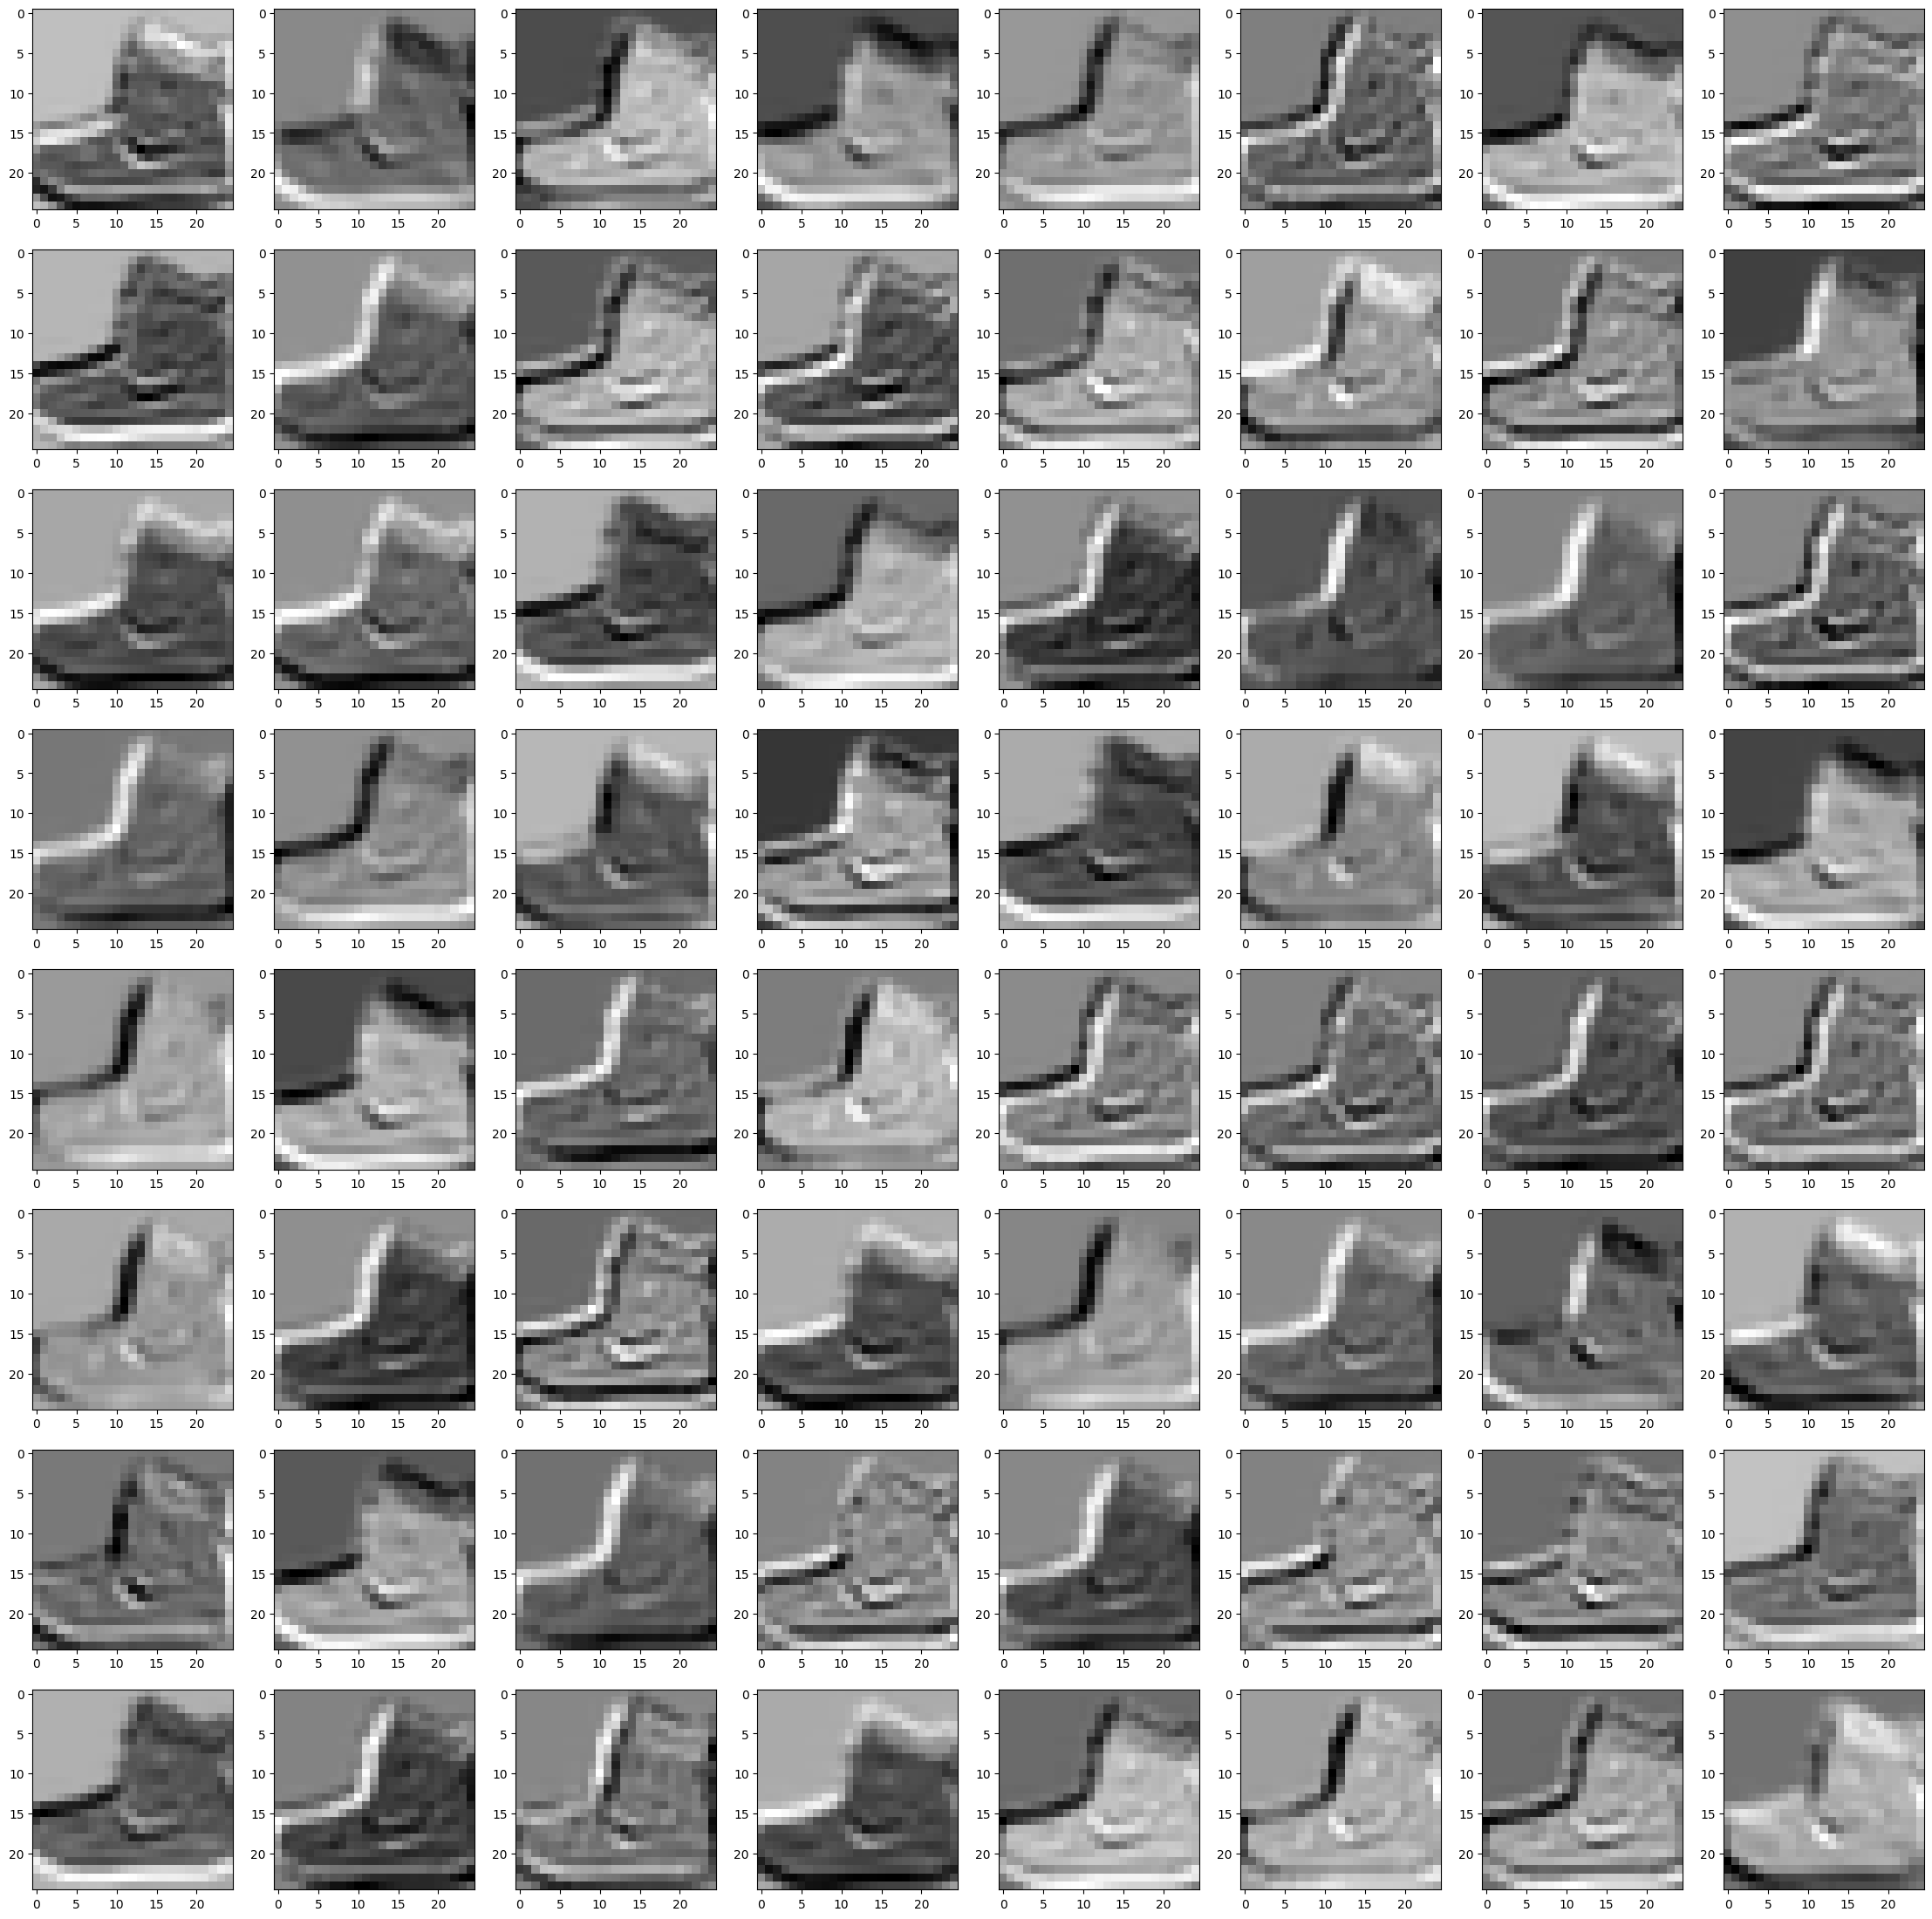

In [25]:
#calculating features_map
features = model.predict(image_tensor)

fig = plt.figure(figsize=(28,28))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')

plt.show()

In [27]:
model4 = Model(inputs=cnn.inputs , outputs=cnn.layers[7].output)
model4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 average_pooling2d (Average  (None, 26, 26, 32)        0         
 Pooling2D)                                                      
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        8256

In [29]:
image_tensor1=tf.reshape(train_images[0],(1,28,28))

1/1 [==============================] - 0s 26ms/step


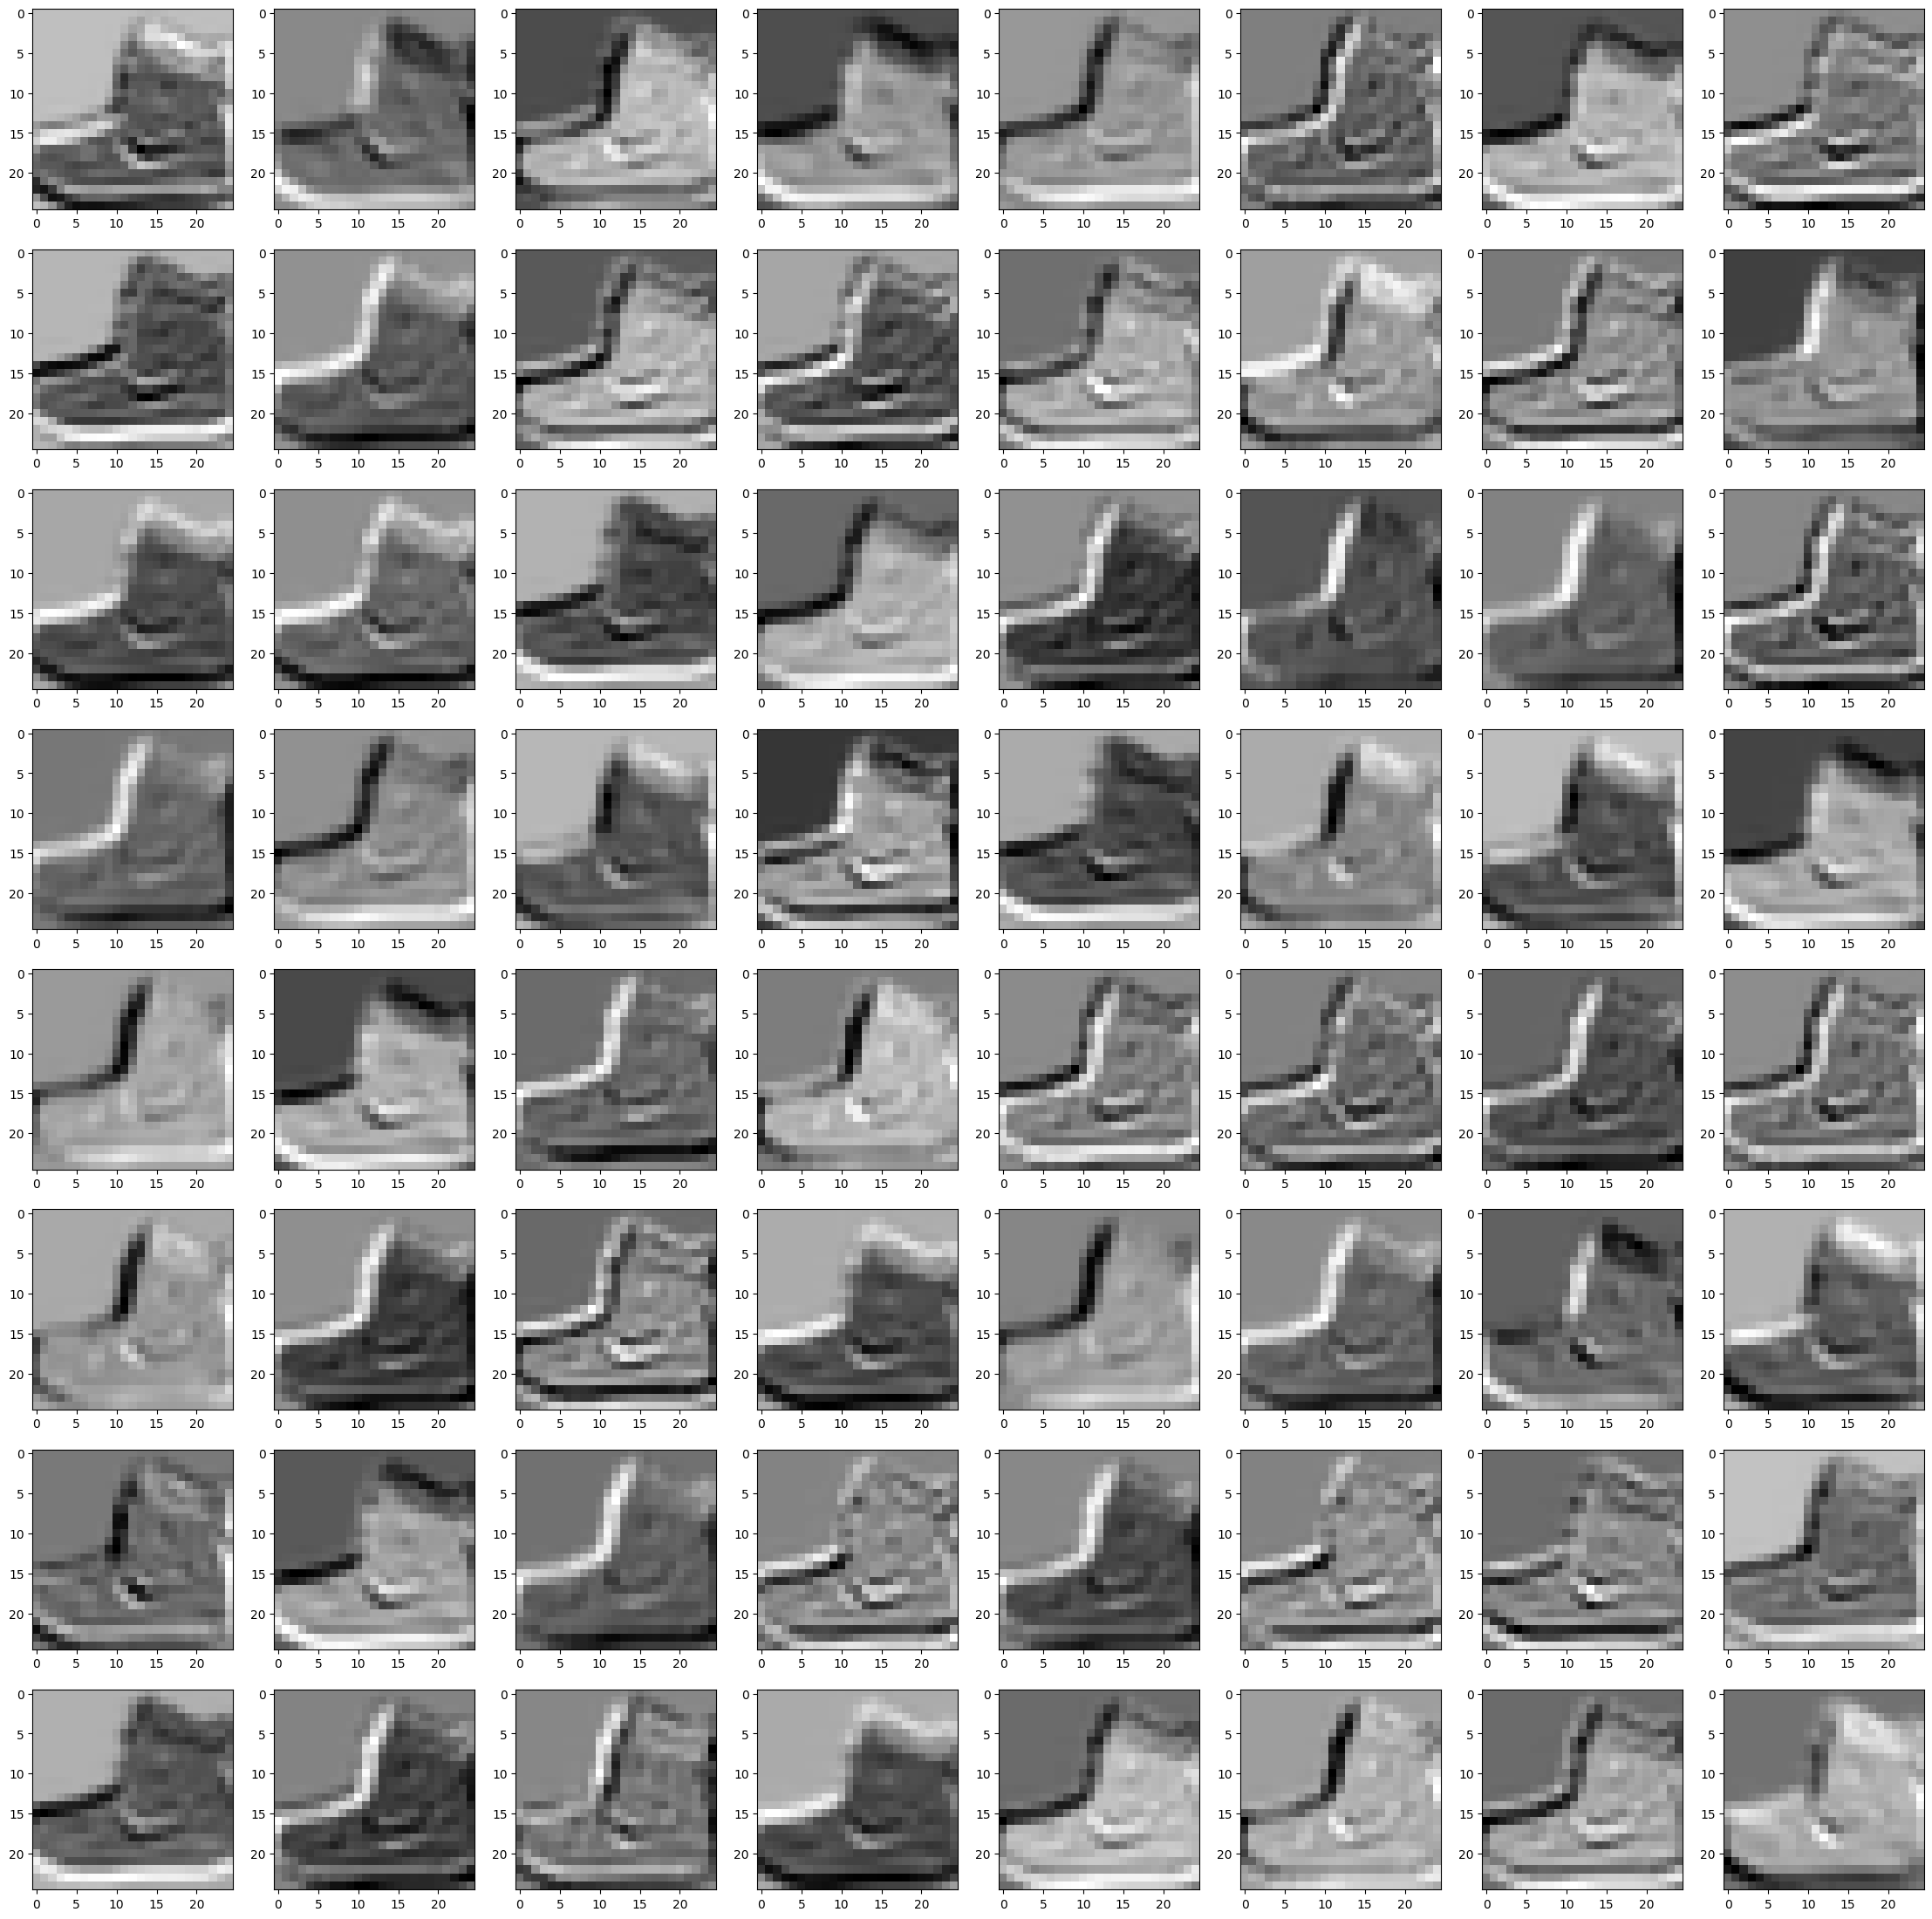

In [30]:
#calculating features_map
features = model.predict(image_tensor)

fig = plt.figure(figsize=(28,28))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')

plt.show()